In [4]:
print("Hello Wolrd!")

Hello Wolrd!


In [5]:
import pandas as pd


In [6]:

# Load the data
df = pd.read_csv('retail_price.csv')

In [17]:
df.head()

,product_id,product_category_name,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,health7,health_beauty,1,64.99,11.060000,64.99,59,492,2,200,...,64.99,3.9,11.060000,64.99,3.9,11.060000,64.99,3.9,11.060,64.94
2017-01-01,health5,health_beauty,8,2799.20,22.901250,349.90,51,625,1,900,...,349.90,4.3,22.901250,349.90,4.3,22.901250,64.99,3.9,11.060,349.85
2017-02-01,bed2,bed_bath_table,2,179.80,13.020000,89.90,54,245,1,1383,...,89.90,3.9,13.020000,89.90,3.9,13.020000,89.90,3.9,13.020,89.85
2017-02-01,garden8,garden_tools,1,179.99,33.540000,179.99,33,2188,2,7650,...,179.99,4.2,33.540000,179.99,4.2,33.540000,179.99,4.2,33.540,179.94
2017-02-01,health9,health_beauty,11,219.89,11.750909,19.99,48,575,1,100,...,19.99,4.3,11.750909,19.99,4.3,11.750909,64.99,3.9,15.348,19.94


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 676 entries, 2017-01-01 to 2018-08-01
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   qty                         676 non-null    int64  
 3   total_price                 676 non-null    float64
 4   freight_price               676 non-null    float64
 5   unit_price                  676 non-null    float64
 6   product_name_lenght         676 non-null    int64  
 7   product_description_lenght  676 non-null    int64  
 8   product_photos_qty          676 non-null    int64  
 9   product_weight_g            676 non-null    int64  
 10  product_score               676 non-null    float64
 11  customers                   676 non-null    int64  
 12  weekday                     676 non-null    int64  
 13  weekend         

## Step 1: Data Cleaning & Preparation

In [ ]:
# Convert month_year to datetime
df['date'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y')


In [13]:
#Drop Redundant Columns
df.drop(['month_year', 'month', 'year'], axis=1, inplace=True)


In [14]:
# Reorder Columns
df = df.sort_values('date')
df.set_index('date', inplace=True)  # Useful for time series


In [15]:
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 676 entries, 2017-01-01 to 2018-08-01
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   qty                         676 non-null    int64  
 3   total_price                 676 non-null    float64
 4   freight_price               676 non-null    float64
 5   unit_price                  676 non-null    float64
 6   product_name_lenght         676 non-null    int64  
 7   product_description_lenght  676 non-null    int64  
 8   product_photos_qty          676 non-null    int64  
 9   product_weight_g            676 non-null    int64  
 10  product_score               676 non-null    float64
 11  customers                   676 non-null    int64  
 12  weekday                     676 non-null    int64  
 13  weekend         

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 676 entries, 2017-01-01 to 2018-08-01
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   qty                         676 non-null    int64  
 3   total_price                 676 non-null    float64
 4   freight_price               676 non-null    float64
 5   unit_price                  676 non-null    float64
 6   product_name_lenght         676 non-null    int64  
 7   product_description_lenght  676 non-null    int64  
 8   product_photos_qty          676 non-null    int64  
 9   product_weight_g            676 non-null    int64  
 10  product_score               676 non-null    float64
 11  customers                   676 non-null    int64  
 12  weekday                     676 non-null    int64  
 13  weekend         

## Step 2: Exploratory Data Analysis (EDA)

In [19]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


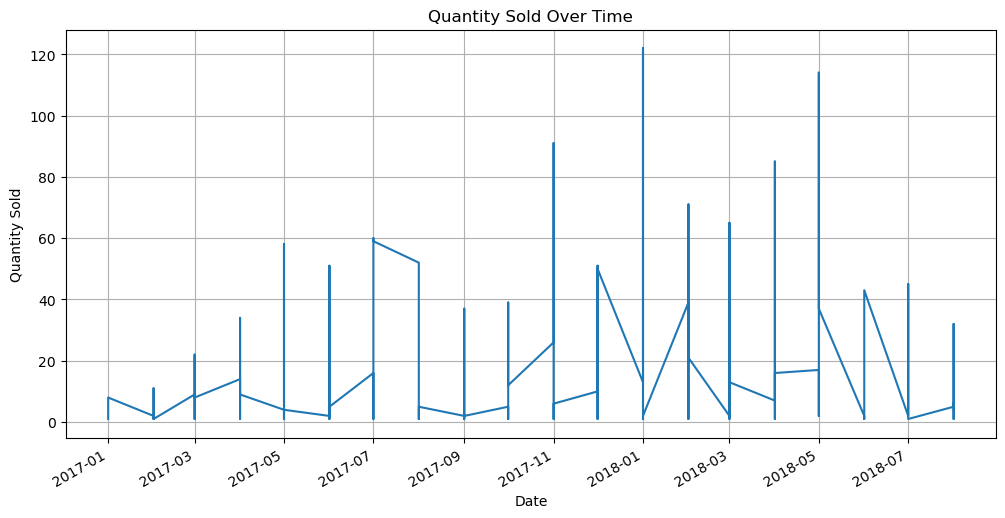

In [ ]:
# Visualize Quantity Sold Over Time
#Top product categories by total quantity sold
import matplotlib.pyplot as plt

df['qty'].plot (figsize=(12,6), title='Quantity Sold Over Time')
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.grid(True)
plt.show()


<Axes: title={'center': 'Total Quantity Sold by Product Category'}, xlabel='product_category_name'>

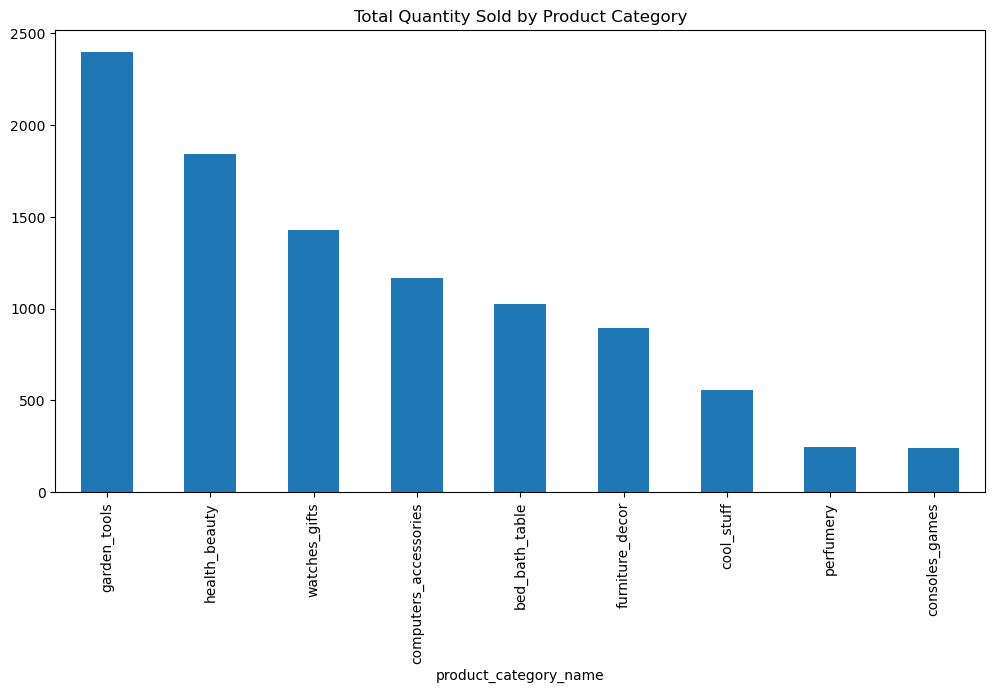

In [ ]:
# Product-Level Analysis
#Top product categories by total quantity sold:
df.groupby('product_category_name')['qty'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title='Total Quantity Sold by Product Category')


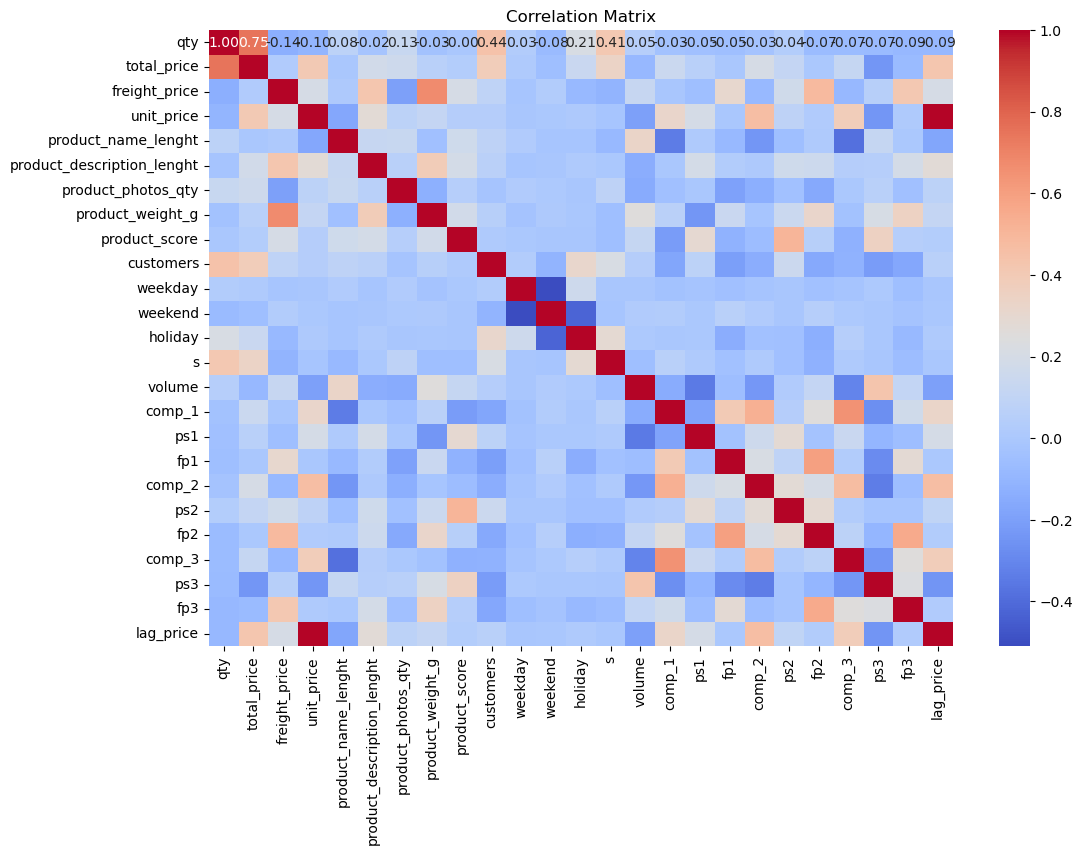

'Especially check correlations with:\n\nunit_price\n\nfreight_price\n\nholiday, weekend, product_score, comp_1, lag_price, etc.'

In [ ]:
#Correlation Analysis
#See how different features relate to sales (qty).
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


"""Especially check correlations with:
unit_price
freight_price
holiday, weekend, product_score, comp_1, lag_price, etc.
"""

<Axes: title={'center': 'Average Quantity Sold by Weekday'}, xlabel='date'>

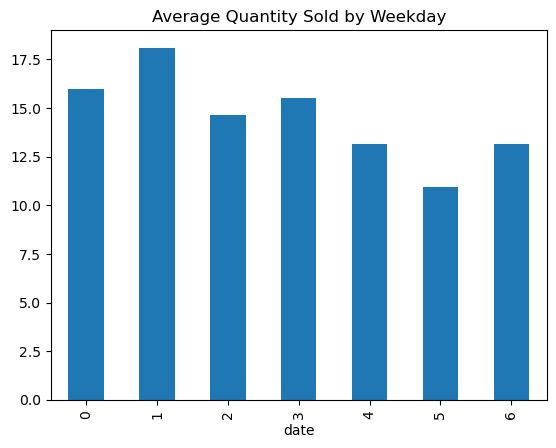

In [33]:
# Seasonality / Temporal Patterns
#Break down by month or weekday:
df.groupby(df.index.weekday)['qty'].mean().plot(kind='bar', title='Average Quantity Sold by Weekday')


<Axes: title={'center': 'Average Quantity Sold by Month'}, xlabel='date'>

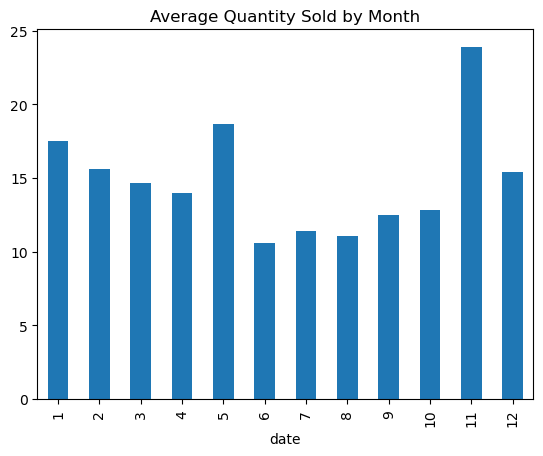

In [34]:
df.groupby(df.index.month)['qty'].mean().plot(kind='bar', title='Average Quantity Sold by Month')

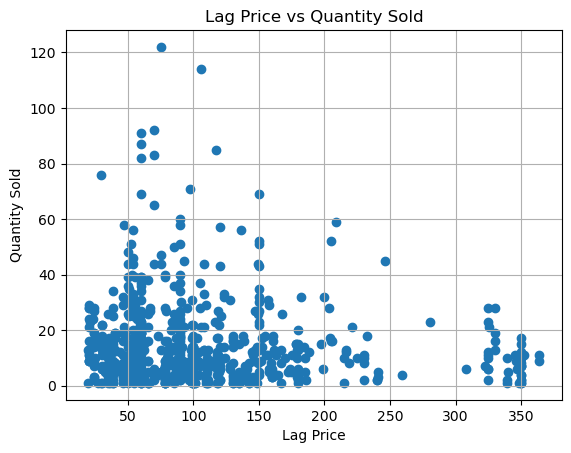

In [36]:
# Lag Effect
#Plot lag price vs current qty to see delayed price effect

plt.scatter(df['lag_price'], df['qty'])
plt.xlabel("Lag Price")
plt.ylabel("Quantity Sold")
plt.title("Lag Price vs Quantity Sold")
plt.grid(True)
plt.show()

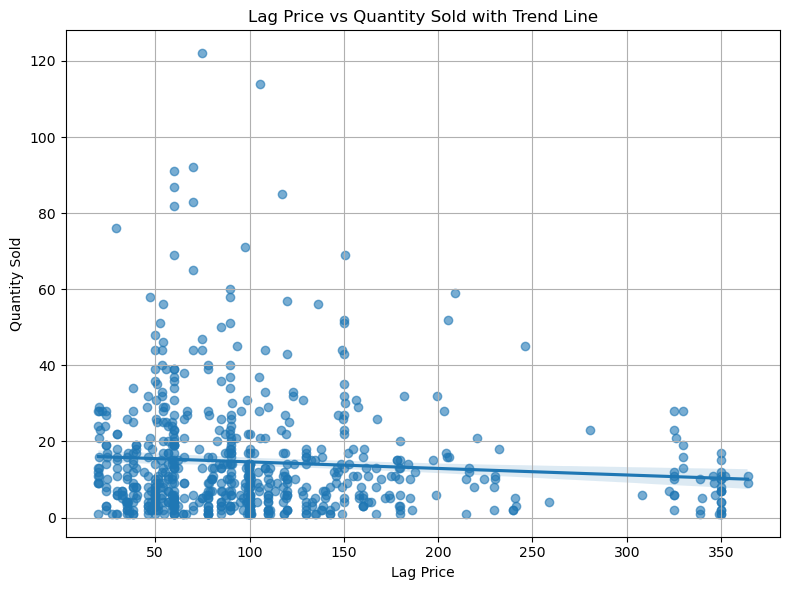

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot with trend line
plt.figure(figsize=(8, 6))
sns.regplot(x='lag_price', y='qty', data=df, scatter_kws={'alpha':0.6})
plt.xlabel("Lag Price")
plt.ylabel("Quantity Sold")
plt.title("Lag Price vs Quantity Sold with Trend Line")
plt.grid(True)
plt.tight_layout()
plt.show()


Slight Negative Trend:

The trend line slopes slightly downward, indicating a very weak negative correlation.

Interpretation: As lagged prices increase, there is a slight tendency for current quantity sold to decrease.